In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import json
import numpy as np
import cv2


#import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#from skimage.io import imread
from sklearn import preprocessing
from skimage.io import imread
from skimage.transform import resize

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [4]:
categories = open('C:/food-101/food-101/meta/classes.txt').read().split()
cats = random.sample(categories,5)
dir = "C:/food-101/food-101/images/"

randomSampleCount = 1000

random.seed(255)
sequence = [i for i in range(1000)]
randList = random.sample(sequence, randomSampleCount)

randomSampled = []
scaleddir = 'C:/food-101/food-101/imagesScaled/'
for cat in categories:
    directory = scaleddir + cat
    path = os.listdir(directory)
    index = 0
    imagesToBeSampled = []
    for images in path:
        index = index + 1
        if(index in randList):
            imagesToBeSampled.append(images)
    randomSampled.append(imagesToBeSampled)


### CNN ###
from sklearn.preprocessing import MinMaxScaler

scaled_X = []
images2 = []

scaleddir = 'C:/food-101/food-101/imagesScaled/'

index = 0
for cat in random.sample(categories, 5):
    directory = scaleddir + cat    
    path = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    index = index + 1
    for images in path:
        toArr = imread(os.path.join(directory, images))
        img_resized = resize(toArr, (100, 100,3))
     
        scaled_X.append(img_resized)
        images2.append(categories.index(cat))

scaled_X = np.array(scaled_X)

#encode image labels 
le = preprocessing.LabelEncoder()
le.fit(images2)

#train/test split
rs = 45
x_train, x_test, y_train, y_test = train_test_split(
    scaled_X, 
    le.transform(images2), 
    test_size=0.3, 
    random_state=rs, 
    stratify=images2)

CNN Model Selection


Epoch 1/20
110/110 [==============================] - 21s 189ms/step - loss: 1.5669 - accuracy: 0.2746 - val_loss: 1.4496 - val_accuracy: 0.3733
Epoch 2/20
110/110 [==============================] - 19s 177ms/step - loss: 1.4457 - accuracy: 0.3826 - val_loss: 1.3763 - val_accuracy: 0.4247
Epoch 3/20
110/110 [==============================] - 17s 155ms/step - loss: 1.3493 - accuracy: 0.4294 - val_loss: 1.3253 - val_accuracy: 0.4447
Epoch 4/20
110/110 [==============================] - 17s 159ms/step - loss: 1.2139 - accuracy: 0.5157 - val_loss: 1.2363 - val_accuracy: 0.5160
Epoch 5/20
110/110 [==============================] - 16s 147ms/step - loss: 1.1217 - accuracy: 0.5609 - val_loss: 1.0973 - val_accuracy: 0.5667
Epoch 6/20
110/110 [==============================] - 16s 150ms/step - loss: 1.0195 - accuracy: 0.5974 - val_loss: 1.1367 - val_accuracy: 0.5553
Epoch 7/20
110/110 [==============================] - 16s 150ms/step - loss: 0.9626 - accuracy: 0.6217 - val_loss: 1.0346 - val_ac

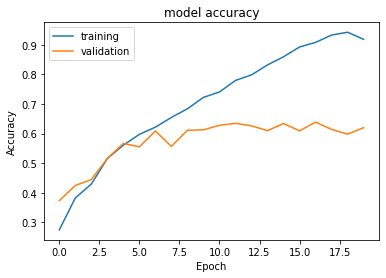

Maximum Validation Accuracy =  0.6386666893959045


In [5]:
# MODEL 1
# 4 LAYERS
#Try different batch sizes
model_cnn = models.Sequential(
    [
        layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)), #32 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(5),

        
    ])
#model_cnn.summary()

## Convert data to tf tensors and train 

x_test_tensor = tf.convert_to_tensor(x_test)
x_train_tensor = tf.convert_to_tensor(x_train)


y_test_tensor = tf.convert_to_tensor(y_test)
y_train_tensor = tf.convert_to_tensor(y_train)

model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #SCC is optimal for multiclass
              metrics=['accuracy'])

history = model_cnn.fit(x_train_tensor, y_train_tensor, epochs=20, 
                    validation_data=(x_test_tensor, y_test_tensor))

#Validation Curves

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

print('Maximum Validation Accuracy = ', max(history.history['val_accuracy']))

Epoch 1/20
110/110 [==============================] - 17s 154ms/step - loss: 1.4877 - accuracy: 0.3423 - val_loss: 1.2922 - val_accuracy: 0.4740
Epoch 2/20
110/110 [==============================] - 17s 159ms/step - loss: 1.1869 - accuracy: 0.5189 - val_loss: 1.1235 - val_accuracy: 0.5767
Epoch 3/20
110/110 [==============================] - 20s 184ms/step - loss: 0.9857 - accuracy: 0.6151 - val_loss: 1.0699 - val_accuracy: 0.6000
Epoch 4/20
110/110 [==============================] - 20s 179ms/step - loss: 0.8009 - accuracy: 0.7063 - val_loss: 1.1157 - val_accuracy: 0.5760
Epoch 5/20
110/110 [==============================] - 19s 172ms/step - loss: 0.6156 - accuracy: 0.7703 - val_loss: 1.2797 - val_accuracy: 0.5900
Epoch 6/20
110/110 [==============================] - 20s 182ms/step - loss: 0.4008 - accuracy: 0.8531 - val_loss: 1.2402 - val_accuracy: 0.6080
Epoch 7/20
110/110 [==============================] - 21s 190ms/step - loss: 0.2263 - accuracy: 0.9200 - val_loss: 1.6759 - val_ac

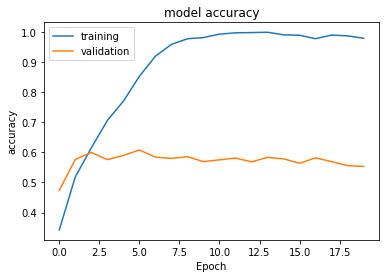

Maximum Validation Accuracy =  0.6079999804496765


In [7]:
# MODEL 2 
# 2 LAYERS

model_cnn = models.Sequential(
    [
        layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)), #32 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(5),

        
    ])



model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_cnn.fit(x_train_tensor, y_train_tensor, epochs=20, 
                    validation_data=(x_test_tensor, y_test_tensor))

#Validation Curves

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

print('Maximum Validation Accuracy = ', max(history.history['val_accuracy']))

Epoch 1/20
110/110 [==============================] - 44s 393ms/step - loss: 1.5087 - accuracy: 0.3414 - val_loss: 1.2890 - val_accuracy: 0.4760
Epoch 2/20
110/110 [==============================] - 41s 372ms/step - loss: 1.2500 - accuracy: 0.4929 - val_loss: 1.1952 - val_accuracy: 0.5327
Epoch 3/20
110/110 [==============================] - 38s 345ms/step - loss: 1.1209 - accuracy: 0.5589 - val_loss: 1.1703 - val_accuracy: 0.5420
Epoch 4/20
110/110 [==============================] - 38s 347ms/step - loss: 0.9953 - accuracy: 0.6157 - val_loss: 1.0957 - val_accuracy: 0.5853
Epoch 5/20
110/110 [==============================] - 42s 384ms/step - loss: 0.8380 - accuracy: 0.6800 - val_loss: 1.1182 - val_accuracy: 0.5973
Epoch 6/20
110/110 [==============================] - 41s 375ms/step - loss: 0.6839 - accuracy: 0.7529 - val_loss: 1.1551 - val_accuracy: 0.5920
Epoch 7/20
110/110 [==============================] - 43s 391ms/step - loss: 0.5230 - accuracy: 0.8020 - val_loss: 1.1700 - val_ac

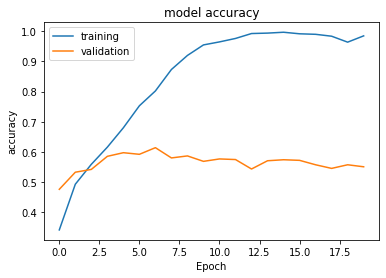

Maximum Validation Accuracy =  0.6140000224113464


In [9]:
#MODEL 3
# 2 LAYERS, Increase output channels
model_cnn = models.Sequential(
    [
        layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (100,100,3)), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128,(3,3), activation = 'relu'), #128 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128,(3,3), activation = 'relu'), #128 output channels, (3,3) convolution window
        
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(5),

        
    ])


model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_cnn.fit(x_train_tensor, y_train_tensor, epochs=20, 
                    validation_data=(x_test_tensor, y_test_tensor))

#Validation Curves

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

print('Maximum Validation Accuracy = ', max(history.history['val_accuracy']))